In [1]:
pip install pandas numpy matplotlib seaborn plotly


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# **3. Load DataSet**

In [3]:
# Load dataset
df = pd.read_csv("Telco-Customer-Churn.csv")

# Display first 5 rows
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **4. Initial Exploratory Data Analysis (EDA)**

In [4]:
# Shape of dataset
print("Shape:", df.shape)

# Info about columns
df.info()

# Quick overview of numerical stats
df.describe()


Shape: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 n

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Identify categorical vs numerical features

In [5]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)


Categorical Features: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']
Numerical Features: ['SeniorCitizen', 'tenure', 'MonthlyCharges']


Check for missing values

In [6]:
df.isnull().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


find missing values, handle them

In [7]:
# Fill missing numerical values with median
for col in numerical_features:
    df[col].fillna(df[col].median(), inplace=True)

# Fill missing categorical values with mode
for col in categorical_features:
    df[col].fillna(df[col].mode()[0], inplace=True)


/tmp/ipython-input-2361793016.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-2361793016.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

# **5. Descriptive Statistics**

Generate summary statistics:

In [8]:
# Mean, Median, Variance
print("Mean:\n", df[numerical_features].mean())
print("\nMedian:\n", df[numerical_features].median())
print("\nVariance:\n", df[numerical_features].var())

# Correlation Matrix
correlation_matrix = df[numerical_features].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)


Mean:
 SeniorCitizen      0.162147
tenure            32.371149
MonthlyCharges    64.761692
dtype: float64

Median:
 SeniorCitizen      0.00
tenure            29.00
MonthlyCharges    70.35
dtype: float64

Variance:
 SeniorCitizen       0.135875
tenure            603.168108
MonthlyCharges    905.410934
dtype: float64

Correlation Matrix:
                 SeniorCitizen    tenure  MonthlyCharges
SeniorCitizen        1.000000  0.016567        0.220173
tenure               0.016567  1.000000        0.247900
MonthlyCharges       0.220173  0.247900        1.000000


Visualize correlations:

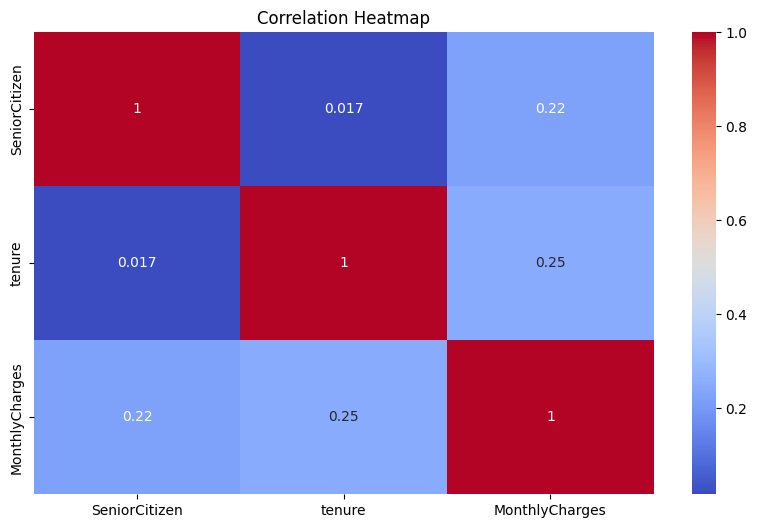

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


# **6. Visualize Patterns & Relationships**

Churn distribution

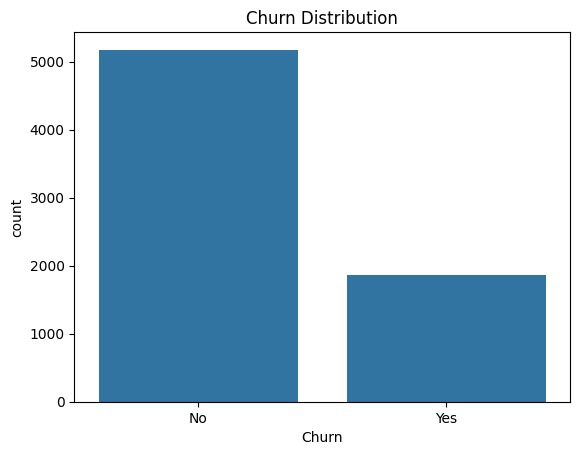

In [10]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()


Churn by gender

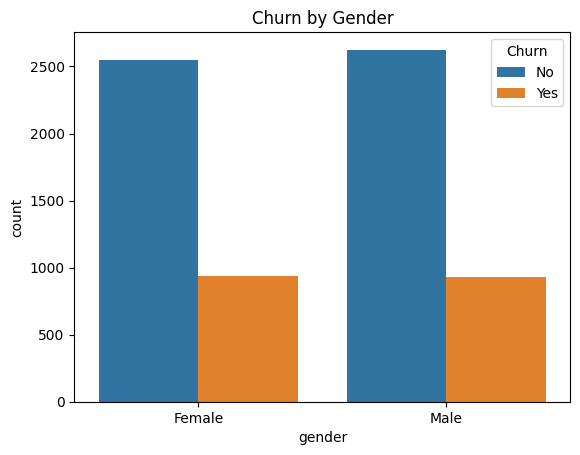

In [11]:
sns.countplot(x='gender', hue='Churn', data=df)
plt.title("Churn by Gender")
plt.show()


Monthly charges vs Churn

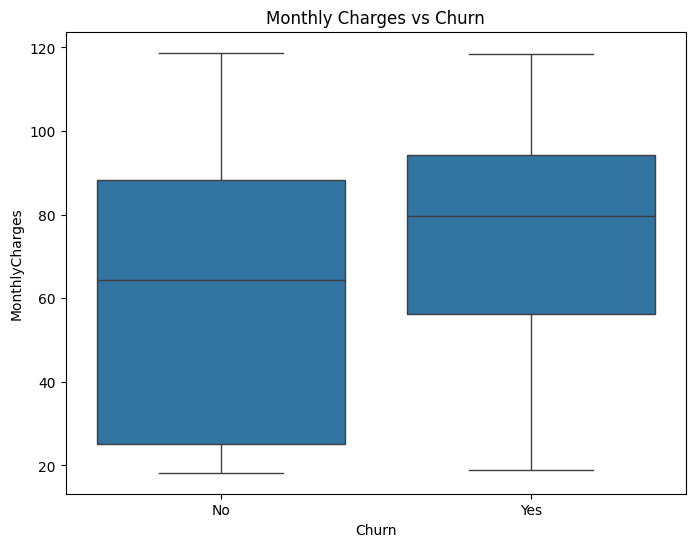

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


Interactive Plot with Plotly

In [13]:
fig = px.scatter(df, x='MonthlyCharges', y='tenure', color='Churn',
                 title="Monthly Charges vs Tenure by Churn")
fig.show()


# **7. Save Cleaned Data**
After EDA and cleaning:

In [14]:
df.to_csv("Cleaned_Customer_Churn.csv", index=False)
